In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
Multi_City_Airport_df = pd.read_csv("../Resources/Clean_Multi_City_Airport_Markets.csv")

# Display sample data
Multi_City_Airport_df.head()


,tbl,Year,quarter,citymarketid_Dept,citymarketid_Arriv,Departure_city,Arrival_city,Airportid_Departure,Airportid_Arrival,D_airport_code,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_Departure,Geocoded_Arrival,tbl1apk
0,Table1a,2018,4,32575,33195,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",12892,15304,LAX,...,296.07,DL,0.3715,368.40,WN,0.3380,241.02,"Los Angeles, CA (Metropolitan Area)\r\n(34.052...",NaN,201841289215304LAXTPA
1,Table1a,2018,4,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",12892,14747,LAX,...,177.68,AS,0.5631,169.76,AS,0.5631,169.76,"Los Angeles, CA (Metropolitan Area)\r\n(34.052...",NaN,201841289214747LAXSEA
2,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,12264,LAX,...,310.32,UA,0.5517,357.82,AS,0.2095,226.80,"Los Angeles, CA (Metropolitan Area)\r\n(34.052...",NaN,201841289212264LAXIAD
3,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,11278,LAX,...,305.38,AA,0.4535,321.18,AS,0.2020,260.36,"Los Angeles, CA (Metropolitan Area)\r\n(34.052...",NaN,201841289211278LAXDCA
4,Table1a,2018,4,32575,30852,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",12892,10821,LAX,...,221.51,WN,0.4442,242.89,NK,0.1541,123.65,"Los Angeles, CA (Metropolitan Area)\r\n(34.052...",NaN,201841289210821LAXBWI


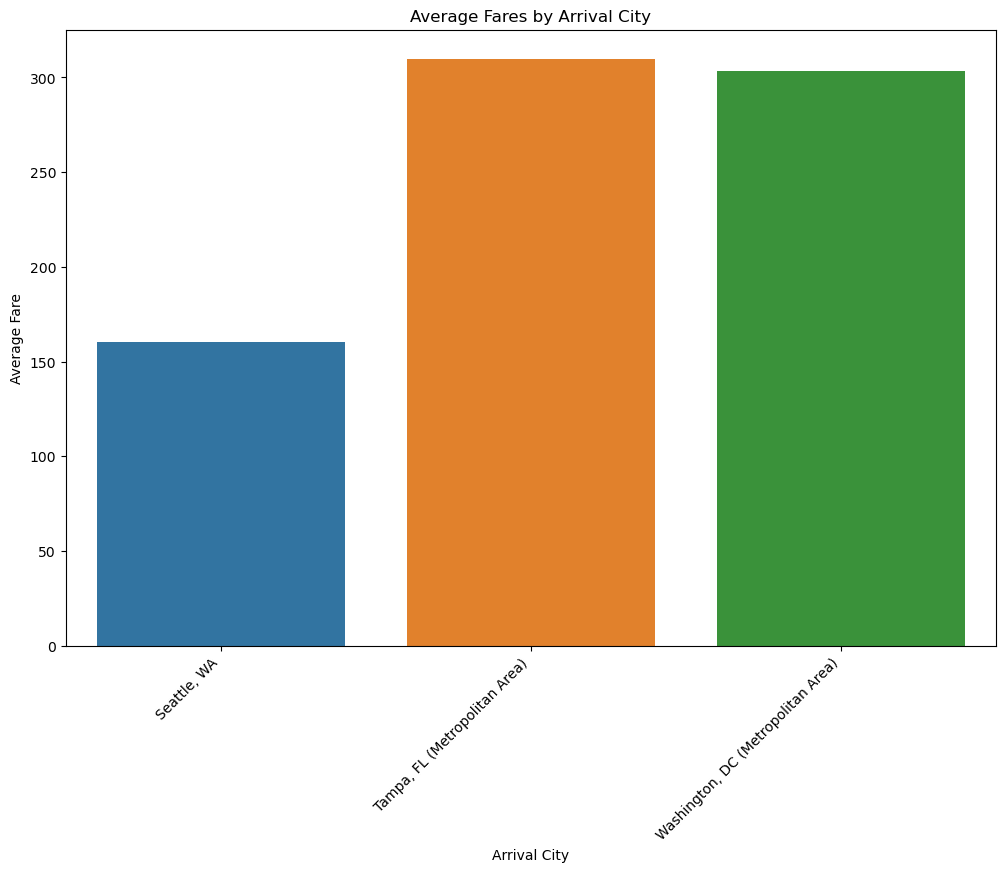

In [3]:
#Scenario 1: Average Fares by Arrival City
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Arrival City and calculate average fares
avg_fares_by_city = Multi_City_Airport_df.groupby('Arrival_city')['fare'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_fares_by_city, x='Arrival_city', y='fare')
plt.title('Average Fares by Arrival City')
plt.xlabel('Arrival City')
plt.ylabel('Average Fare')
plt.xticks(rotation=45, ha='right')
plt.savefig('../output/avg_fares_by_city_barplot.png')
plt.show()

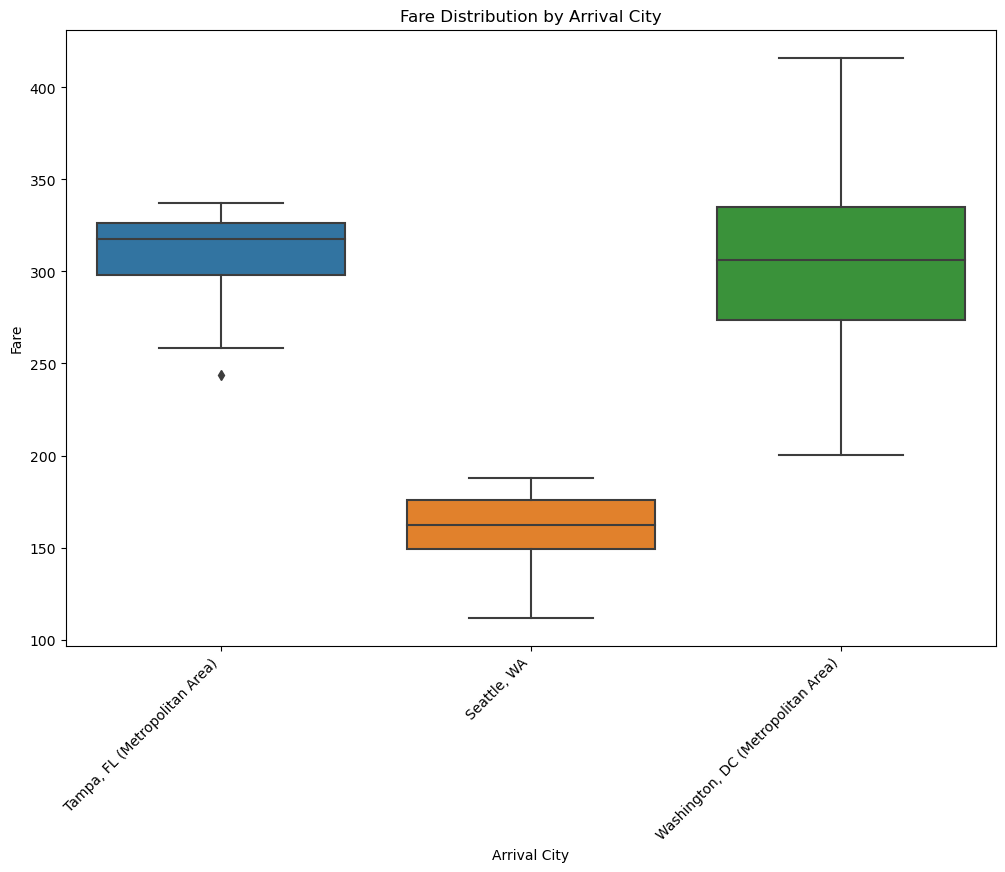

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=Multi_City_Airport_df, x='Arrival_city', y='fare')
plt.title('Fare Distribution by Arrival City')
plt.xlabel('Arrival City')
plt.ylabel('Fare')
plt.xticks(rotation=45, ha='right')
plt.savefig('../output/fare_distribution_by_city_boxplot.png')
plt.show()
#It represents the distribution of fares for different arrival cities, allowing you to compare the central tendency, spread, and identify potential outliers in the fare data across the specified cities.

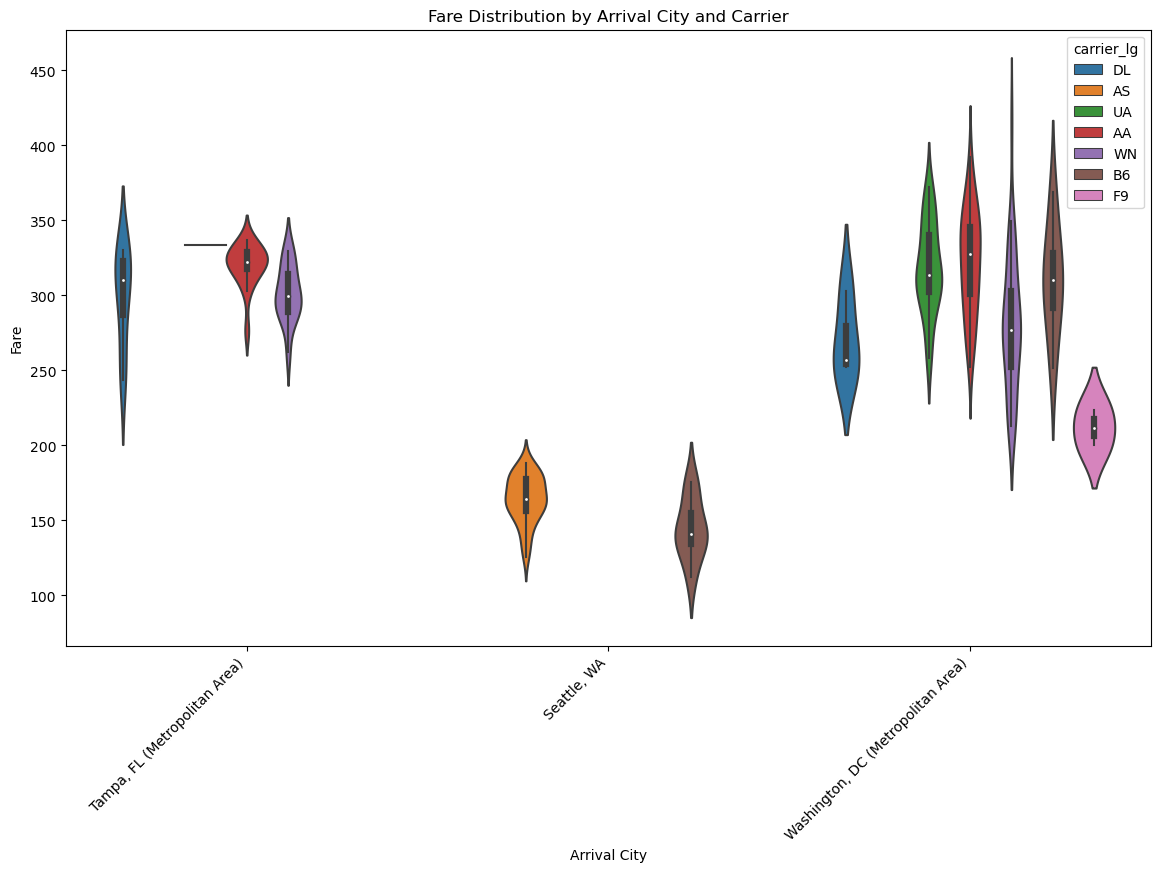

In [4]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=Multi_City_Airport_df, x='Arrival_city', y='fare', hue='carrier_lg')
plt.title('Fare Distribution by Arrival City and Carrier')
plt.xlabel('Arrival City')
plt.ylabel('Fare')
plt.xticks(rotation=45, ha='right')
plt.savefig('../output/fare_distribution_by_city_carrier_violinplot.png')
plt.show()

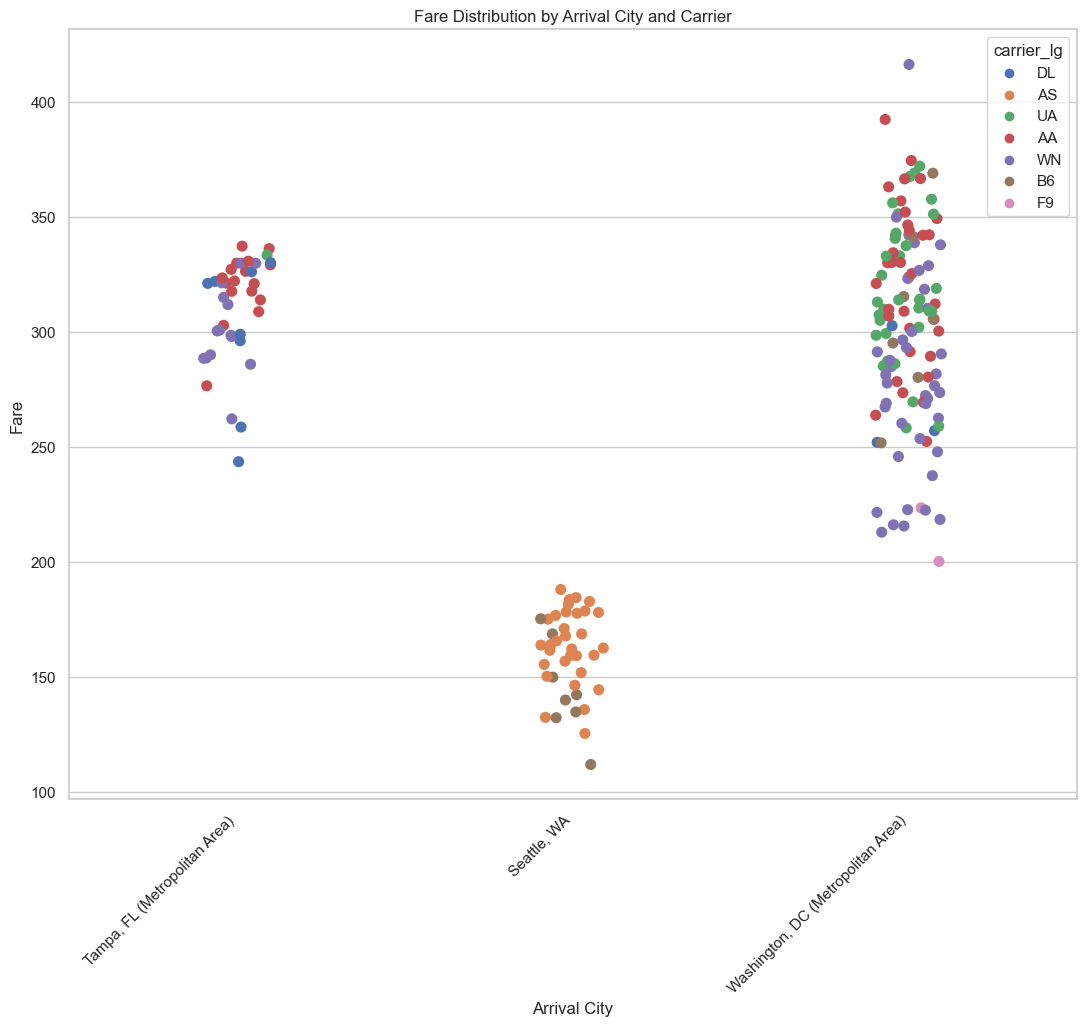

In [49]:
sns.set(style = 'whitegrid')   
#tip = seaborn.load_dataset("tips")   
       
#seaborn.stripplot(x="day", y="total_bill", data=tip) 


plt.figure(figsize=(13, 10))
sns.stripplot(data=Multi_City_Airport_df, x='Arrival_city', y='fare',  hue='carrier_lg', size=8, linewidth=0)
plt.title('Fare Distribution by Arrival City and Carrier')
plt.xlabel('Arrival City')
plt.ylabel('Fare')
plt.xticks(rotation=45, ha='right')
plt.savefig('../output/fare_distribution_by_city_carrier_stripplot.png')
plt.show()

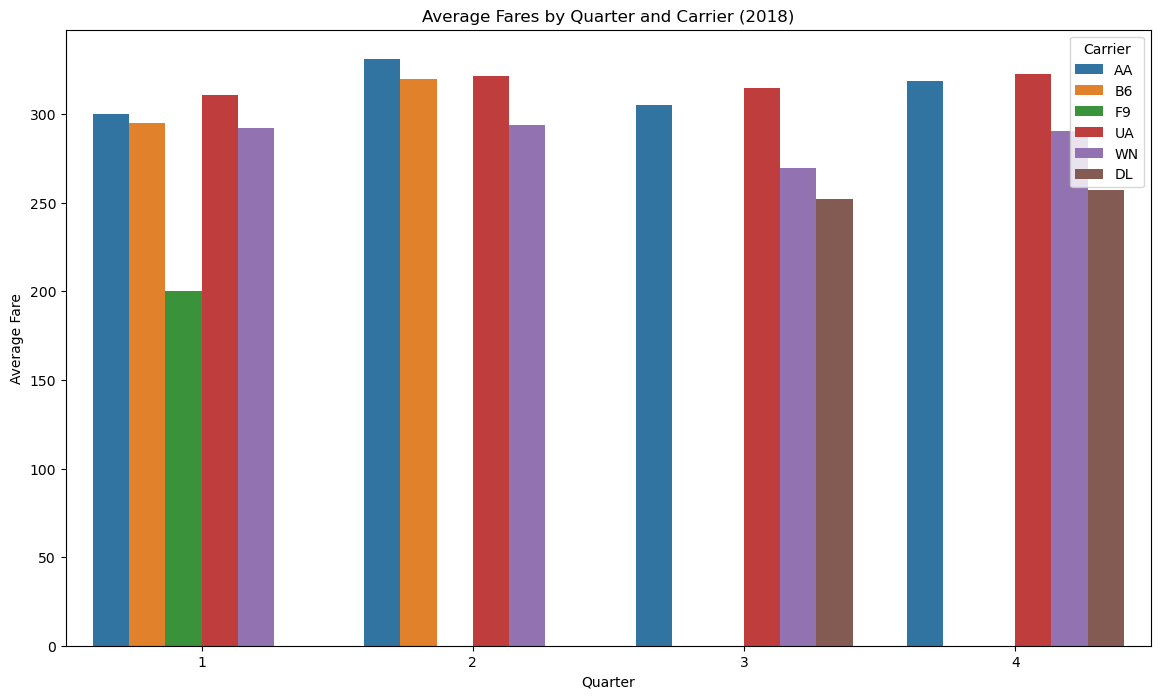

In [7]:

#calculate the average fares for different cities in 2018 for each 
#quarter where the Departure_city is always Los Angeles, CA (Metropolitan Area) and the Arrival_city is always Washington, DC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the required columns

# Filter data for the specified conditions
filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (Multi_City_Airport_df['Arrival_city'] == 'Washington, DC (Metropolitan Area)') &
                 (Multi_City_Airport_df['Year'] == 2018)]

# Filter data for the specified carriers
carriers = ['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL']
filtered_df = filtered_df[filtered_df['carrier_lg'].isin(carriers)]

# Group by Quarter, Carrier, and calculate average fares
grouped_data = filtered_df.groupby(['quarter', 'carrier_lg']).agg({
    'fare': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='quarter', y='fare', hue='carrier_lg')
plt.title('Average Fares by Quarter and Carrier (2018)')
plt.xlabel('Quarter')
plt.ylabel('Average Fare')
plt.legend(title='Carrier', loc='upper right')
plt.savefig('../output/average_fares_by_quarter_and_carrier.png')
plt.show()
#This code filters the data for the specified conditions, groups it by quarter and carrier, and then calculates the average fares for each group. Finally, it creates a bar plot showing the average fares by quarter and carrier. Adjust the file paths and names as needed.

In [8]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter the DataFrame based on specified conditions
filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (Multi_City_Airport_df['Arrival_city'] == 'Washington, DC (Metropolitan Area)') &
                 (Multi_City_Airport_df['Year'] == 2018)]

# Filter by carrier_lg
filtered_df = filtered_df[filtered_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])]

# Group by Year, quarter, and calculate average fare per passenger
grouped_data = filtered_df.groupby(['Year', 'quarter', 'carrier_lg']).agg({
    'fare': 'mean',
    'passengers': 'sum'
}).reset_index()

# Calculate average fare per passenger
grouped_data['avg_fare_per_passenger'] = grouped_data['fare'] / grouped_data['passengers']

# Display the result
print(grouped_data)


    Year  quarter carrier_lg        fare  passengers  avg_fare_per_passenger
0   2018        1         AA  300.270000        1550                0.193723
1   2018        1         B6  295.110000           3               98.370000
2   2018        1         F9  200.200000          82                2.441463
3   2018        1         UA  311.030000        1675                0.185690
4   2018        1         WN  292.366000        1578                0.185276
5   2018        2         AA  331.052500        1766                0.187459
6   2018        2         B6  319.555000          17               18.797353
7   2018        2         UA  321.267500        2301                0.139621
8   2018        2         WN  293.716000        2054                0.142997
9   2018        3         AA  305.360000        1480                0.206324
10  2018        3         DL  251.960000           5               50.392000
11  2018        3         UA  314.626000        2320                0.135615

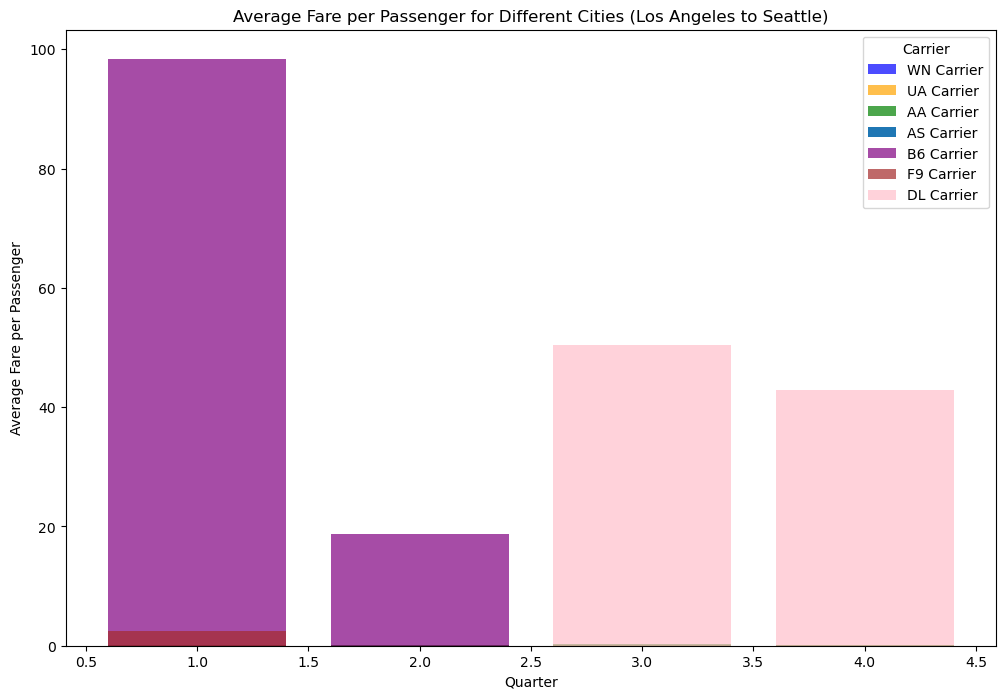

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'grouped_data' contains the calculated values
# If not, replace it with the actual variable containing the grouped data

# Set up the plot
plt.figure(figsize=(12, 8))

# Define colors for different carriers
colors = {'WN': 'blue', 'UA': 'orange', 'AA': 'green', 'AS': 'red', 'B6': 'purple', 'F9': 'brown', 'DL': 'pink'}

# Iterate through carriers and plot bars
for carrier, color in colors.items():
    subset = grouped_data[grouped_data['carrier_lg'] == carrier]
    plt.bar(subset['quarter'], subset['avg_fare_per_passenger'], label=f'{carrier} Carrier', color=color, alpha=0.7)

# Set plot labels and legend
plt.title('Average Fare per Passenger for Different Cities (Los Angeles to Seattle)')
plt.xlabel('Quarter')
plt.ylabel('Average Fare per Passenger')
plt.legend(title='Carrier')

# Show the plot
plt.show()


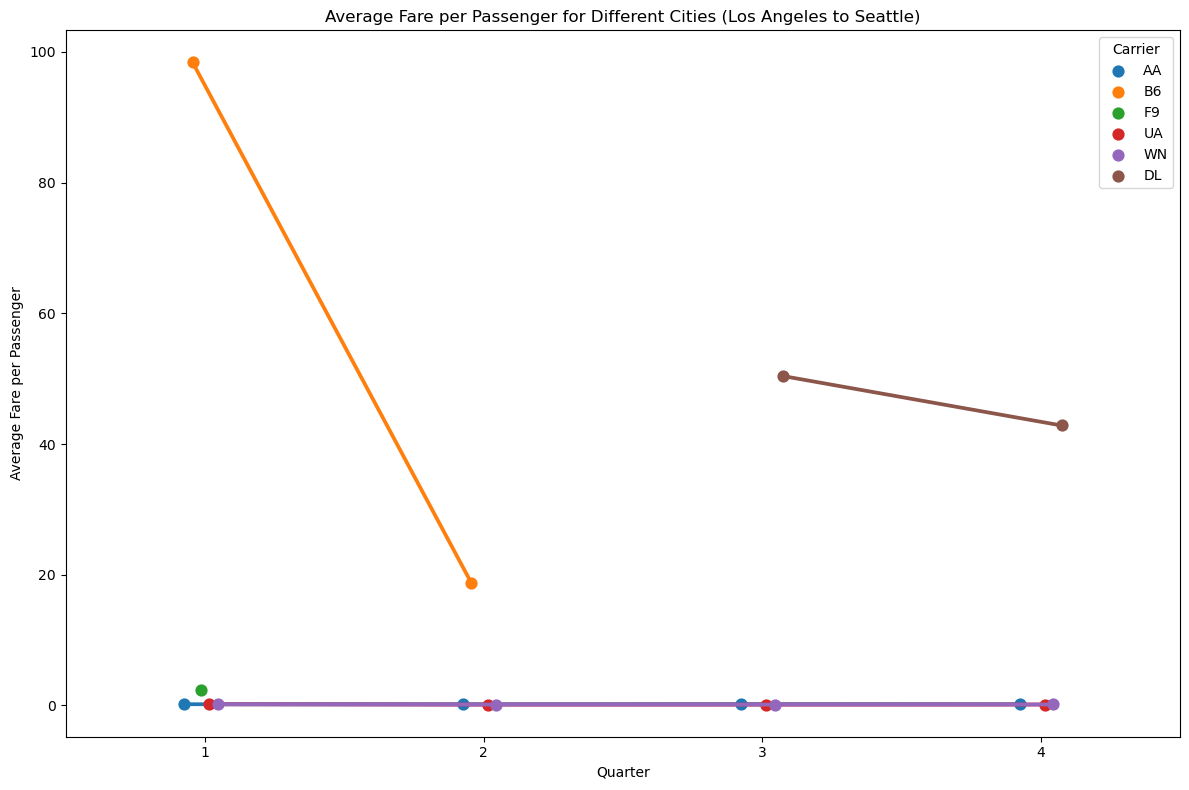

In [107]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'grouped_data' contains the calculated values
# If not, replace it with the actual variable containing the grouped data

# Plotting
plt.figure(figsize=(12, 8))
sns.pointplot(data=grouped_data, x='quarter', y='avg_fare_per_passenger', hue='carrier_lg', dodge=True)
plt.title('Average Fare per Passenger for Different Cities (Los Angeles to Seattle)')
plt.xlabel('Quarter')
plt.ylabel('Average Fare per Passenger')
plt.legend(title='Carrier')
plt.savefig('../output/average_fares_per_passenger_for _diff_cities.png')
plt.show()
#In this plot, each point represents the average fare per passenger for a specific carrier in a given quarter. The hue distinguishes between different carriers, providing a clear comparison. The dodge=True parameter separates the points for different carriers at the same x-axis position.

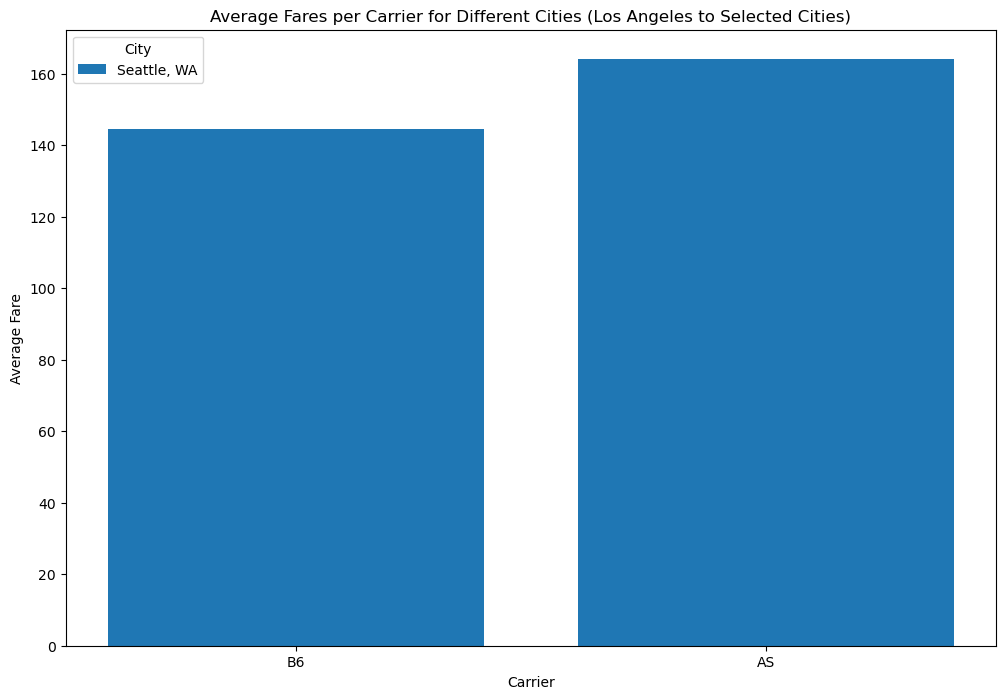

In [12]:
#To find cities with consistently lower average fares per carrier for the specified scenario
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required columns

# Filter the DataFrame based on specified conditions
filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])]

# Group by Arrival_city and Carrier, calculate average fares
grouped_data = filtered_df.groupby(['Arrival_city', 'carrier_lg'])['fare'].mean().reset_index()

# Sort the data for better visualization
grouped_data = grouped_data.sort_values(by=['Arrival_city', 'fare'])

# Plotting
plt.figure(figsize=(12, 8))
for city in grouped_data['Arrival_city'].unique():
    city_data = grouped_data[grouped_data['Arrival_city'] == city]
    plt.bar(city_data['carrier_lg'], city_data['fare'], label=city)

plt.title('Average Fares per Carrier for Different Cities (Los Angeles to Selected Cities)')
plt.xlabel('Carrier')
plt.ylabel('Average Fare')
plt.legend(title='City')
plt.savefig('../output/average_fares_per_carrier_for _diff_cities.png')
plt.show()
#This code filters the DataFrame for flights departing from Los Angeles to Washington, DC, Tampa, FL, or Seattle, WA, groups the data by arrival city and carrier, calculates the average fare for each combination, and then creates a grouped bar plot to visualize the average fares per carrier for different cities. You can adapt this code for other scenarios by modifying the conditions in the filtered_df line.

carrier_lg          B6
fare          144.4075
Name: 1, dtype: object


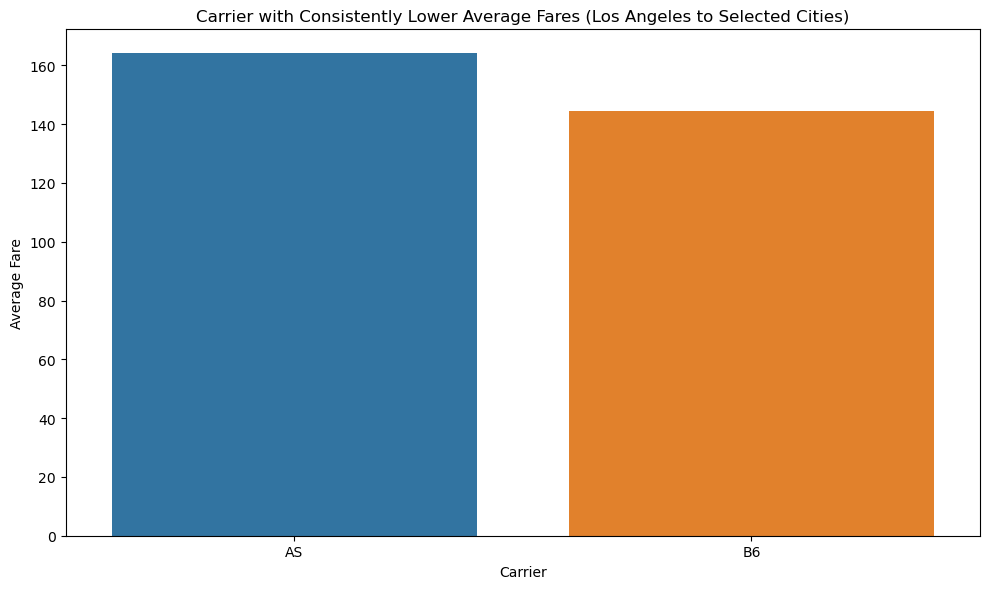

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required columns

# Filter the DataFrame based on specified conditions
filtered_df = df[(df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                 (df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL']))]

# Group by Carrier and calculate average fares
grouped_data = filtered_df.groupby('carrier_lg')['fare'].mean().reset_index()

# Find the carrier with consistently lower average fares
lower_fares_carrier = grouped_data.loc[grouped_data['fare'].idxmin()]

#print(lower_fares_carrier)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='carrier_lg', y='fare')
plt.title('Carrier with Consistently Lower Average Fares (Los Angeles to Selected Cities)')
plt.xlabel('Carrier')
plt.ylabel('Average Fare')
plt.savefig('../output/Carrier_with_Consistently_Lower_Average_Fares.png')
plt.show()


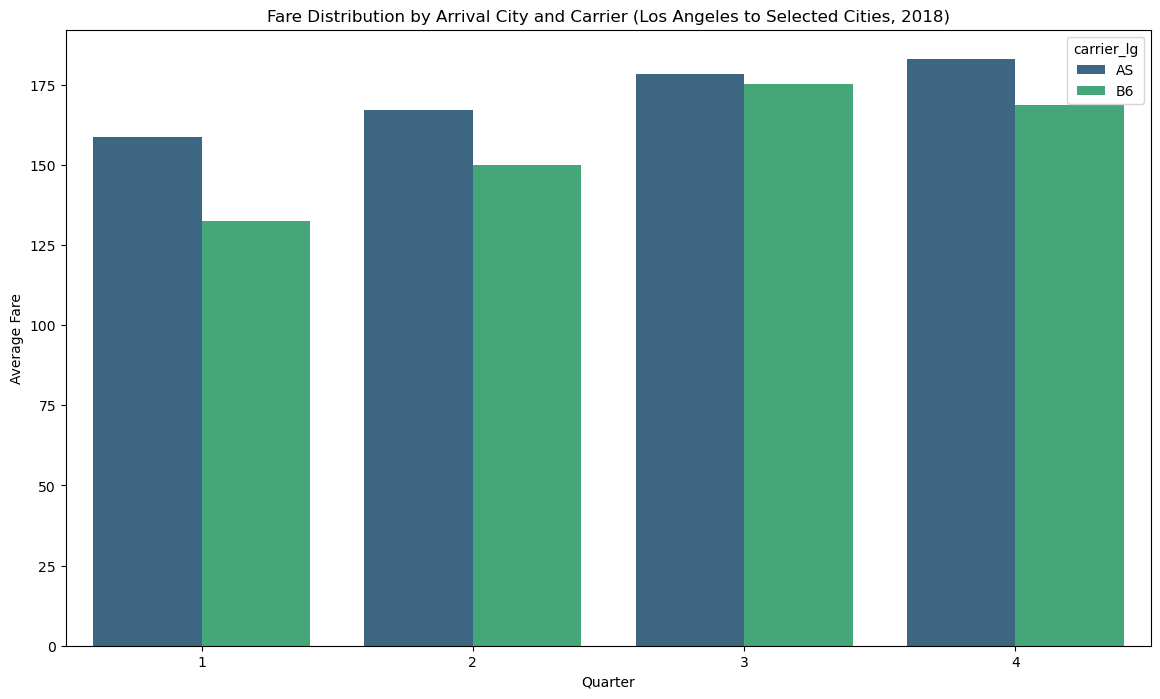

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required columns

# Filter the DataFrame based on specified conditions
filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                 (Multi_City_Airport_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])) &
                 (Multi_City_Airport_df['Year'] == 2018)]

# Group by Arrival City, Carrier, and Quarter, calculate fare distribution
grouped_data = filtered_df.groupby(['Arrival_city', 'carrier_lg', 'quarter'])['fare'].mean().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='quarter', y='fare', hue='carrier_lg', data=grouped_data,
            palette='viridis')
plt.title('Fare Distribution by Arrival City and Carrier (Los Angeles to Selected Cities, 2018)')
plt.xlabel('Quarter')
plt.ylabel('Average Fare')
plt.show()


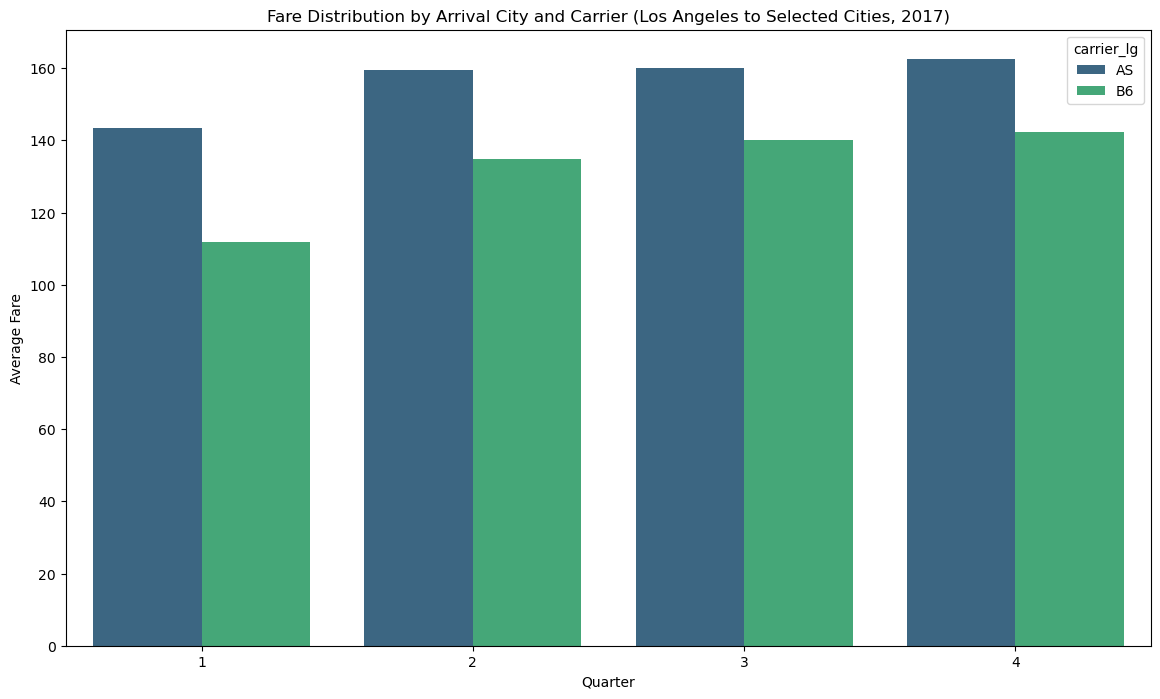

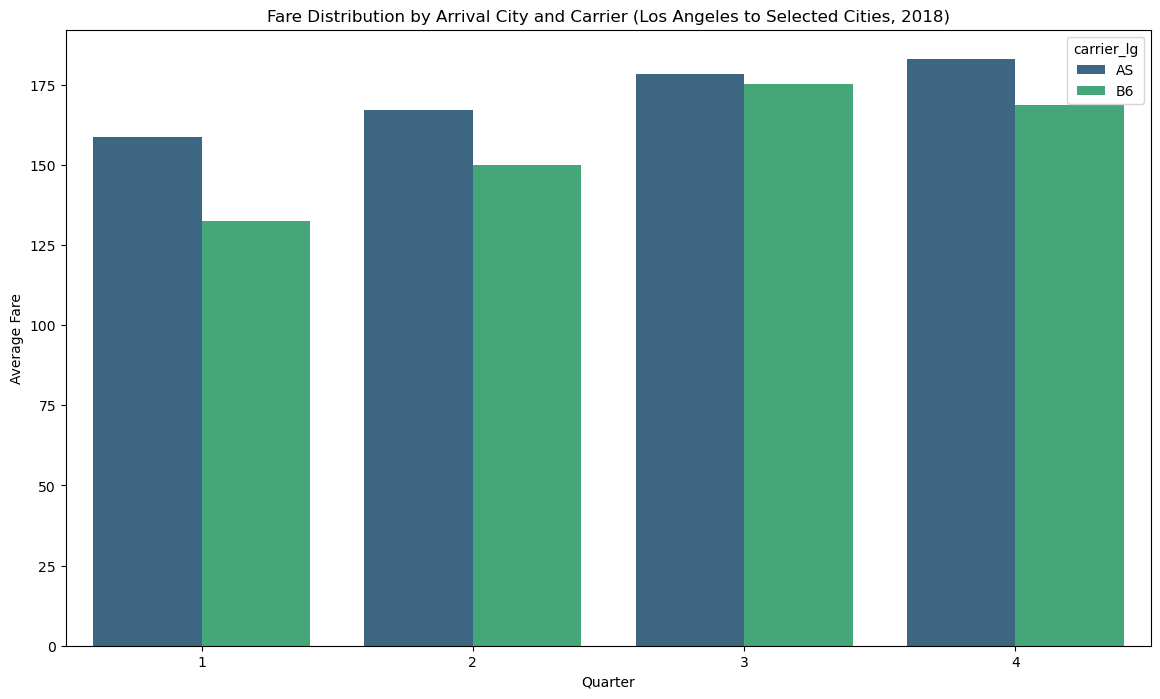

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fare_distribution_by_arrival_city(df, year):
    # Filter the DataFrame based on specified conditions
    filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                     (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                     (Multi_City_Airport_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])) &
                     (Multi_City_Airport_df['Year'] == year)]

    # Group by Arrival City, Carrier, and Quarter, calculate fare distribution
    grouped_data = filtered_df.groupby(['Arrival_city', 'carrier_lg', 'quarter'])['fare'].mean().reset_index()

    # Plotting with Seaborn
    plt.figure(figsize=(14, 8))
    sns.barplot(x='quarter', y='fare', hue='carrier_lg', data=grouped_data,
                palette='viridis')
    plt.title(f'Fare Distribution by Arrival City and Carrier (Los Angeles to Selected Cities, {year})')
    plt.xlabel('Quarter')
    plt.ylabel('Average Fare')
    plt.show()

# Assuming df is your DataFrame with the required columns
# Call the function for the year 2017
plot_fare_distribution_by_arrival_city(Multi_City_Airport_df, year=2017)

# Call the function for the year 2018
plot_fare_distribution_by_arrival_city(Multi_City_Airport_df, year=2018)


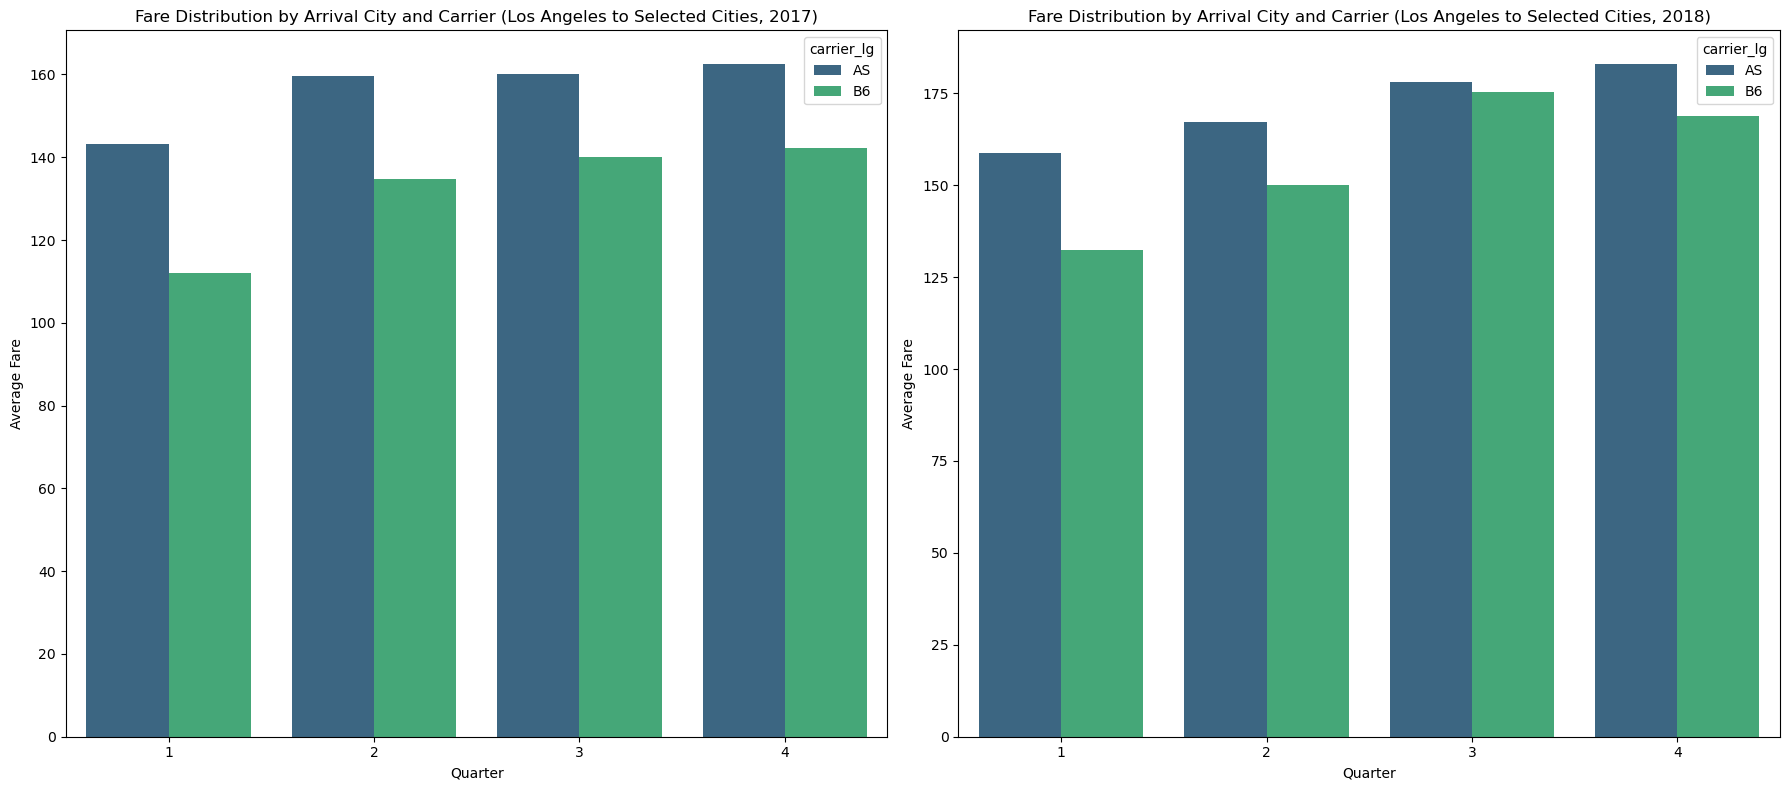

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fare_distribution_by_arrival_city(df, year, ax):
    # Filter the DataFrame based on specified conditions
    filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                     (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                     (Multi_City_Airport_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])) &
                     (Multi_City_Airport_df['Year'] == year)]

    # Group by Arrival City, Carrier, and Quarter, calculate fare distribution
    grouped_data = filtered_df.groupby(['Arrival_city', 'carrier_lg', 'quarter'])['fare'].mean().reset_index()

    # Plotting with Seaborn
    sns.barplot(x='quarter', y='fare', hue='carrier_lg', data=grouped_data,
                palette='viridis', ax=ax)
    ax.set_title(f'Fare Distribution by Arrival City and Carrier (Los Angeles to Selected Cities, {year})')
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Average Fare')

# Assuming df is your DataFrame with the required columns
# Create a subplot with multiple axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Call the function for the year 2017
plot_fare_distribution_by_arrival_city(Multi_City_Airport_df, year=2017, ax=axs[0])

# Call the function for the year 2018
plot_fare_distribution_by_arrival_city(Multi_City_Airport_df, year=2018, ax=axs[1])

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig('../output/fare_distribution_by_arrival_city_and_carrier_2017_2018.png')
plt.show()

#This code creates a subplot with two axes (two columns), and each axis represents a year. The plot_fare_distribution_by_arrival_city function is called for each year, and the respective data is plotted on the corresponding axis. The tight_layout function is used to adjust the spacing between subplots for better visualization.

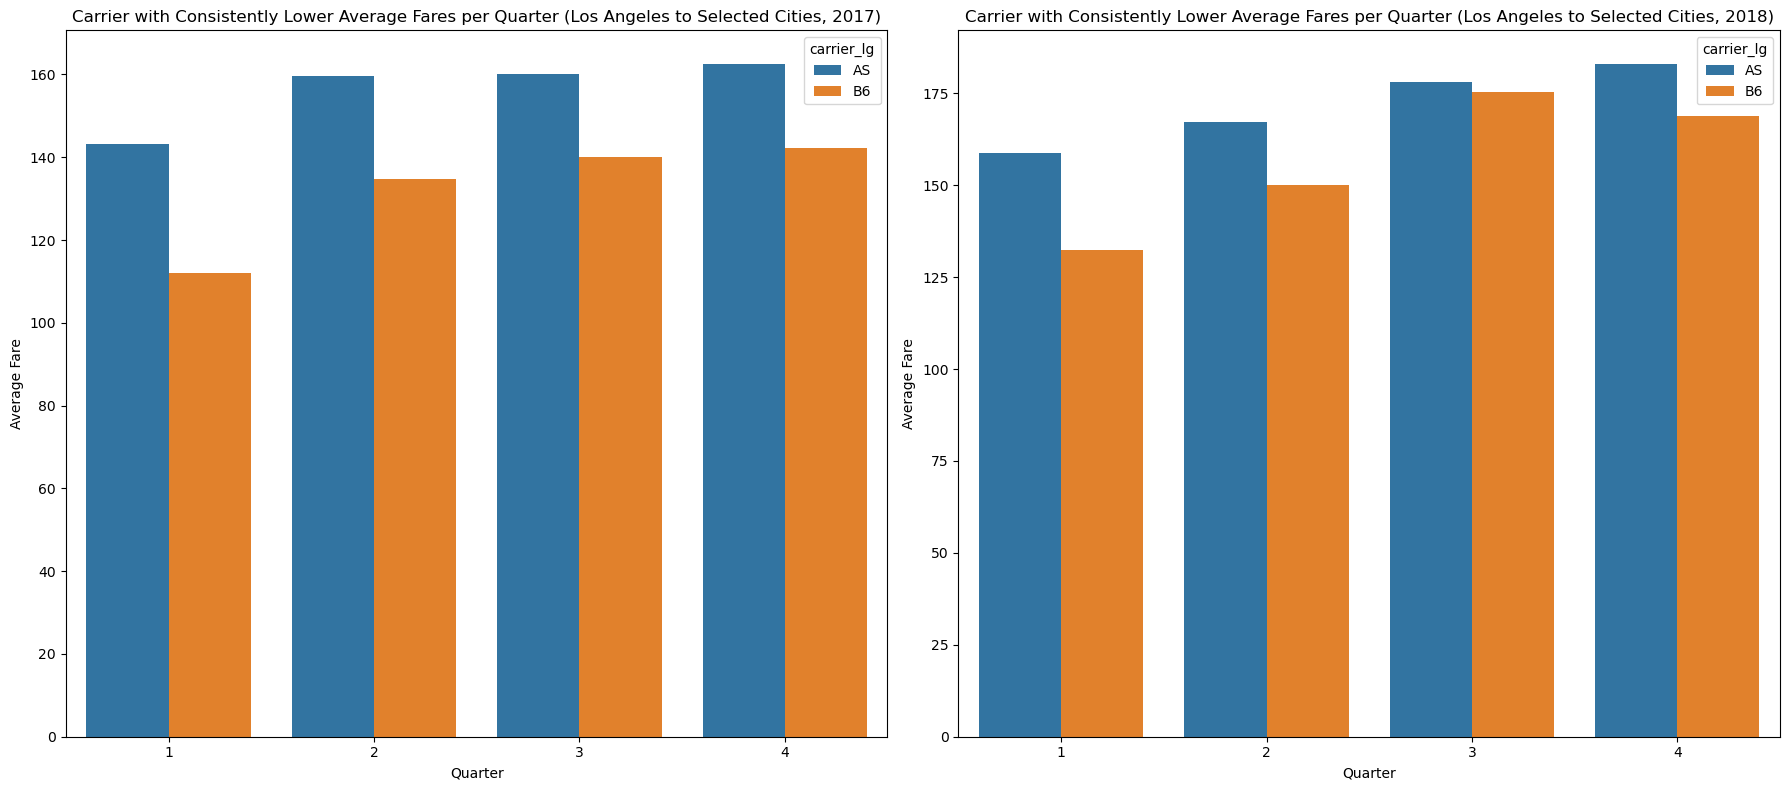

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_carrier_lower_avg_fares_per_quarter(df, year, ax):
    # Filter the DataFrame based on specified conditions
    filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                     (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                     (Multi_City_Airport_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])) &
                     (Multi_City_Airport_df['Year'] == year)]

    # Group by Carrier and Quarter, calculate average fares
    grouped_data = filtered_df.groupby(['carrier_lg', 'quarter'])['fare'].mean().reset_index()

    # Find the carrier with consistently lower average fares per quarter
    lower_fares_carrier_per_quarter = grouped_data.loc[grouped_data.groupby('quarter')['fare'].idxmin()]

    # Plotting with Seaborn
    sns.barplot(data=grouped_data, x='quarter', y='fare', hue='carrier_lg', ax=ax)
    ax.set_title(f'Carrier with Consistently Lower Average Fares per Quarter (Los Angeles to Selected Cities, {year})')
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Average Fare')

# Assuming df is your DataFrame with the required columns
# Create a subplot with multiple axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Call the function for the year 2017
plot_carrier_lower_avg_fares_per_quarter(Multi_City_Airport_df, year=2017, ax=axs[0])

# Call the function for the year 2018
plot_carrier_lower_avg_fares_per_quarter(Multi_City_Airport_df, year=2018, ax=axs[1])

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig('../output/carrier_lower_avg_fares_per_quarter_2017_2018.png')
plt.show()


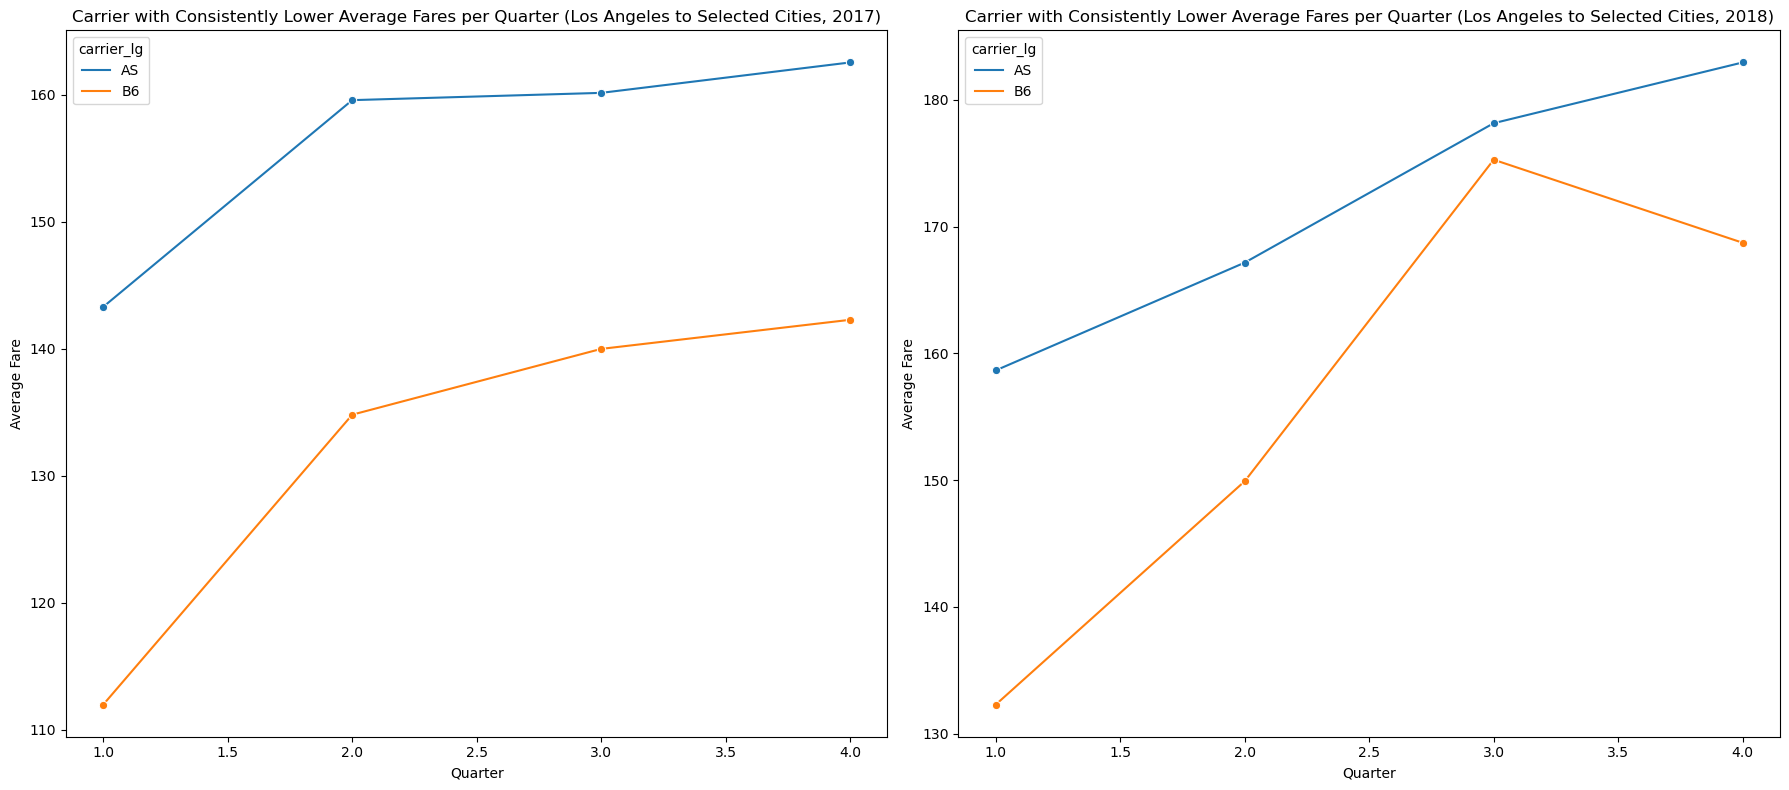

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_carrier_lower_avg_fares_per_quarter(df, year, ax):
    # Filter the DataFrame based on specified conditions
    filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                     (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                     (Multi_City_Airport_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])) &
                     (Multi_City_Airport_df['Year'] == year)]

    # Group by Carrier and Quarter, calculate average fares
    grouped_data = filtered_df.groupby(['carrier_lg', 'quarter'])['fare'].mean().reset_index()

    # Find the carrier with consistently lower average fares per quarter
    lower_fares_carrier_per_quarter = grouped_data.loc[grouped_data.groupby('quarter')['fare'].idxmin()]

    # Plotting with Seaborn
    sns.lineplot(data=grouped_data, x='quarter', y='fare', hue='carrier_lg', ax=ax, marker='o')
    ax.set_title(f'Carrier with Consistently Lower Average Fares per Quarter (Los Angeles to Selected Cities, {year})')
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Average Fare')

# Assuming df is your DataFrame with the required columns
# Create a subplot with multiple axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Call the function for the year 2017
plot_carrier_lower_avg_fares_per_quarter(Multi_City_Airport_df, year=2017, ax=axs[0])

# Call the function for the year 2018
plot_carrier_lower_avg_fares_per_quarter(Multi_City_Airport_df, year=2018, ax=axs[1])

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig('../output/Carrier_with_Consistently_Lower_Average_Fare_per_Quarter_2017_2018.png')
plt.show()


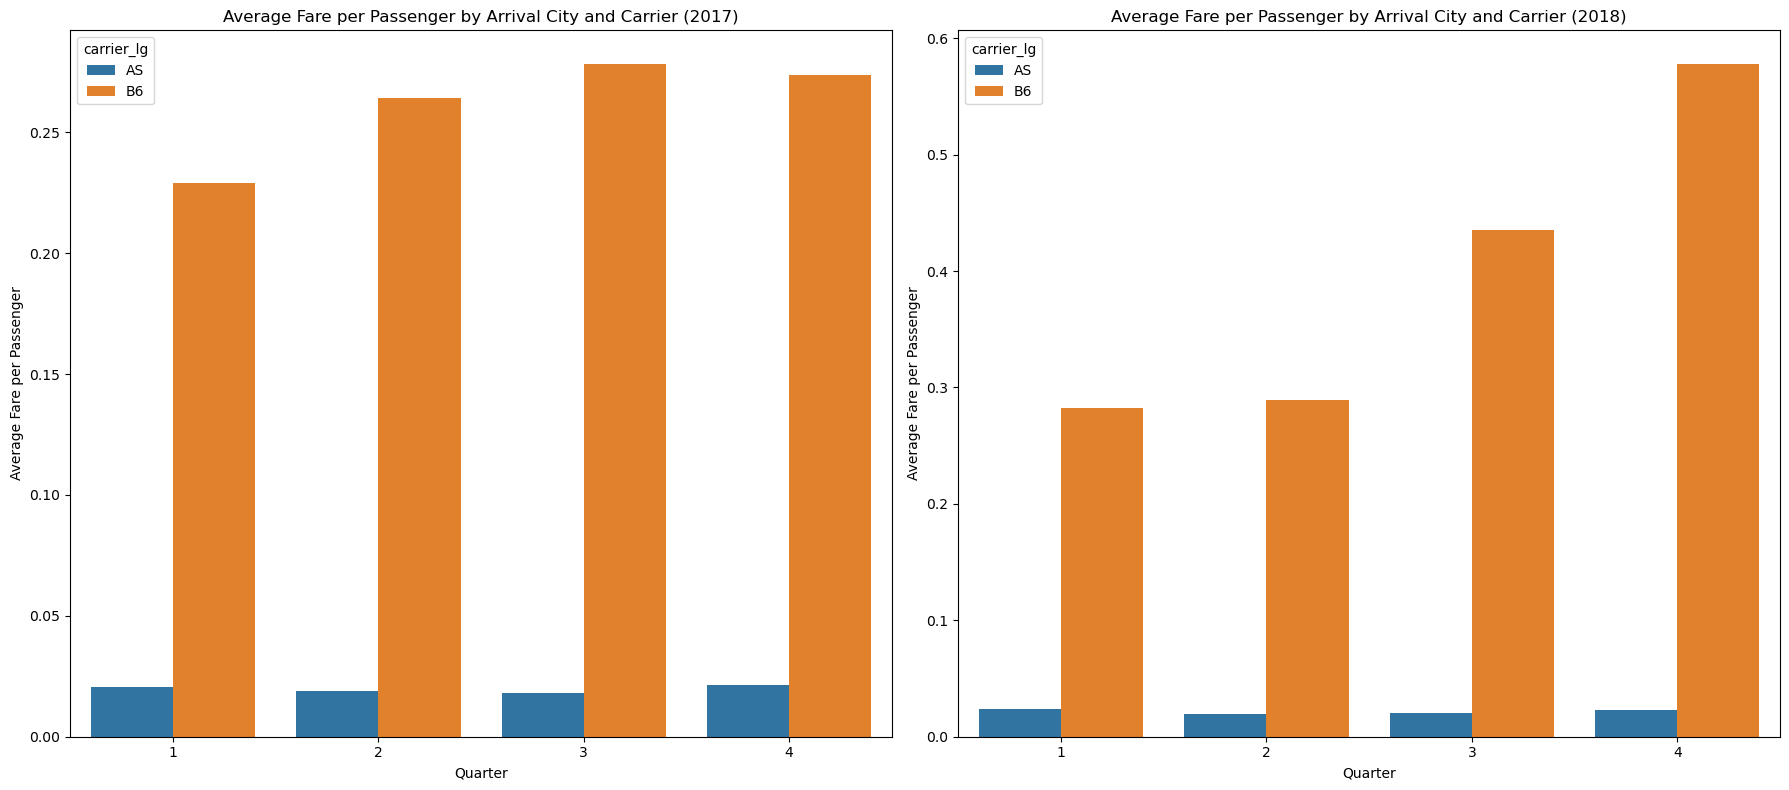

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_avg_fare_per_passenger(df, year, ax):
    # Filter the DataFrame based on specified conditions
    filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                     (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                     (Multi_City_Airport_df['carrier_lg'].isin(['WN', 'UA', 'AA', 'AS', 'B6', 'F9', 'DL'])) &
                     (Multi_City_Airport_df['Year'] == year)]

    # Group by Arrival City, Carrier, and Quarter, calculate average fare per passenger
    grouped_data = filtered_df.groupby(['Arrival_city', 'carrier_lg', 'quarter']).agg({
        'fare': 'mean',
        'passengers': 'sum'
    }).reset_index()

    # Calculate average fare per passenger
    grouped_data['avg_fare_per_passenger'] = grouped_data['fare'] / grouped_data['passengers']

    # Plotting with Seaborn
    sns.barplot(data=grouped_data, x='quarter', y='avg_fare_per_passenger', hue='carrier_lg', ax=ax)
    ax.set_title(f'Average Fare per Passenger by Arrival City and Carrier ({year})')
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Average Fare per Passenger')

# Assuming df is your DataFrame with the required columns
# Create a subplot with multiple axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Call the function for the year 2017
plot_avg_fare_per_passenger(Multi_City_Airport_df, year=2017, ax=axs[0])

# Call the function for the year 2018
plot_avg_fare_per_passenger(Multi_City_Airport_df, year=2018, ax=axs[1])

# Adjust layout for better visualization
plt.tight_layout()
plt.savefig('../output/Avg_Fare_Per_Passenger_by_Arrival_City_2017_2018.png')
plt.show()


In [19]:
import pandas as pd

# Assuming df is your DataFrame with the required columns

# Filter the DataFrame based on specified conditions
filtered_df = Multi_City_Airport_df[(Multi_City_Airport_df['Departure_city'] == 'Los Angeles, CA (Metropolitan Area)') &
                 (Multi_City_Airport_df['Arrival_city'].isin(['Washington, DC', 'Tampa, FL', 'Seattle, WA'])) &
                 (Multi_City_Airport_df['Year'] == 2018)]

# Group by Quarter and Arrival City, calculate average fare
grouped_data = filtered_df.groupby(['quarter', 'Arrival_city'])['fare'].mean().reset_index()

# Display the result
print(grouped_data)


   quarter Arrival_city     fare
0        1  Seattle, WA  153.390
1        2  Seattle, WA  163.714
2        3  Seattle, WA  177.584
3        4  Seattle, WA  180.108
